# Coursera ML Ex2 - Logistic Regression

## 1. Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## 2. Define constants

In [2]:
# training dataset
DATA_FILE_NAME = './ex2data1.csv'
# gradient descent max step 
INTERATIONS = 200000
# learning rate
ALPHA = 0.001

## 3. Cost function

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
    
def compute_cost(X, y, theta):
    # number of training examples
    m = y.size
    # activation
    h = sigmoid(np.dot(X, theta))
    # cost
    j = - np.sum(y * np.log(h) + (1 -  y) * np.log(1 - h)) / m
    return j

## 4. Gradient Descent

In [4]:
def gradient_descent(X, y, theta, alpha, num_inters):
    # number of training examples
    m = y.size
    jHistory = np.empty(num_inters)

    for i in range(num_inters):
        delta = np.dot(X.T, sigmoid(np.dot(X, theta))- y) / m
        theta -= alpha * delta
        jHistory[i] = compute_cost(X, y, theta)
    
    return theta, jHistory

## 5. Load training dataset

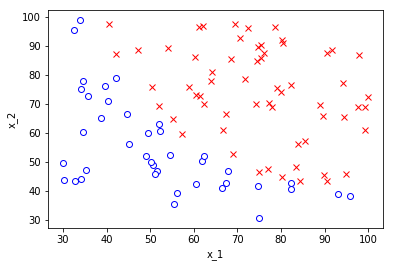

In [5]:
df = pd.read_csv(DATA_FILE_NAME)
df_0 = df[df.y == 0]
df_1 = df[df.y == 1]
# plot data

df_0.plot(x='x_1', y='x_2', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.plot(df_1.x_1, df_1.x_2, marker='x', linestyle='None', mec='r', mfc='w')
plt.xlabel('x_1'); plt.ylabel('x_2'); plt.show()

# extract X,y
X = df.values[:, 0:2]
y = df.values[:,2]
m = y.size # number of training examples
# add X_0 to X
X = np.concatenate((np.ones((m,1)), X.reshape(-1,2)), axis=1)

## 6. Learn parameters

[-7.45017822  0.06550395  0.05898701]


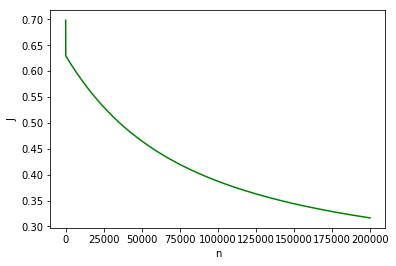

In [6]:
theta, jHistory = gradient_descent(X, y, np.zeros(X.shape[1]), ALPHA, INTERATIONS)
print(theta)
# plot J
plt.plot(range(jHistory.size), jHistory, color='g')
plt.xlabel('n'); plt.ylabel('J'); plt.show()

## 7. Plot result

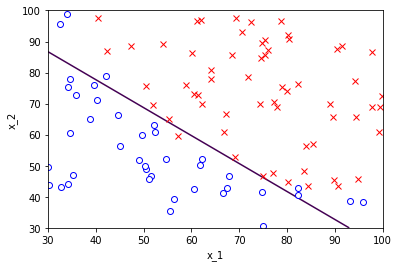

In [7]:
# training data
df_0.plot(x='x_1', y='x_2', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.plot(df_1.x_1, df_1.x_2, marker='x', linestyle='None', mec='r', mfc='w')

# decision line
x = np.linspace(30.0, 100.0, num=100)
y = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        y[i][j] = sigmoid(np.dot(np.array([1.0, x[i], x[j]]).T, theta))
plt.contour(x, x, y, levels=[0.0, 0.5])

# predict for 3.5 and 7.0
plt.xlabel('x_1'); plt.ylabel('x_2'); plt.show()